# Table of contents
- [Linear regression](#Linear-regression)
- [Logistic Regression](#Logistic-regression)
- [Curve fitting](#Curve-fitting)
- [Clustering](#Clustering)
    - [K-means clustering](#K-means-clustering)
    - [Agglomerative hierarchical clustering](#Agglomerative-hierarchical-clustering)
- [A/B Testing](#A-/-B-testing)
    - [One sample t-test](#One-sample-t-test)
    - [Two sample t-test](#Two-sample-t-test)
    - [Paired t-test](#Paired-t-test)
    - [Analysis of variance (ANOVA)](#Analysis-of-Variance---ANOVA)
    - [Kruskall Wallis test](#Kruskall-Wallis test)
- [Correlation](#Correlation)
    - [Positive correlation](#Positive-correlation)
    - [Negative correlation](#Negative-correlation)
    - [Weak or no correlation](#Weak-or-no-correlation)
    - [Correlation matrix](#Correlation-matrix)
- [Heatmaps](#Heatmaps)
- [Time series analysis](#Time-series-analysis)
- [Network analysis](#Network-analysis)
- [Spatial data analysis](#Spatial-data-analysis)

## Linear regression

In [5]:
# Load the data
from sklearn import datasets
data = datasets.load_boston()

# Load linear regression model
from sklearn.linear_model import LinearRegression

# Load numpy and pandas
import numpy as np
import pandas as pd

# define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

X = df # X are the features you want to train on
y = target["MEDV"] # y is the feature you want to predict

# Fit the model
lm = LinearRegression()
model = lm.fit(X,y)

# Predict
predictions = lm.predict(X)

# The R2 score
lm.score(X,y)

# The intercept score
lm.intercept_

36.4911032803614

## Curve fitting

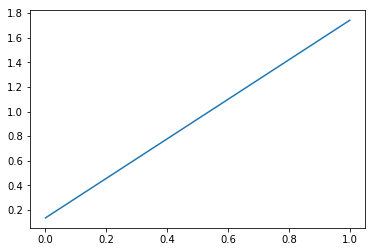

In [24]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Create two separate arrays containing x and y values.
x = np.array([1, 2, 3, 9])
y = np.array([1, 4, 1, 3])

# Curve_fit also requires a function that provides the type of fit you would like. 
# For instance, a linear fit would use a function like
def curve_fit_function(x, a, b):
    return a * x + b

# scipy.optimize.curve_fit(func, x, y) will return a numpy array containing two arrays: 
# the first will contain values for a and b that best fit your data, 
# and the second will be the covariance of the optimal fit parameters.
params = curve_fit(curve_fit_function, x, y)

[a, b] = params[0]
plt.plot(params[0])

## Clustering

### K-means clustering

[[-5.56465793 -2.34988939]
 [-2.40167949 10.17352695]
 [ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]]


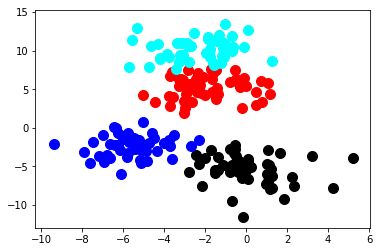

In [16]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# K-means is the most frequently used form of clustering due to its speed and simplicity.
from sklearn.cluster import KMeans

# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0]

# create kmeans object
kmeans = KMeans(n_clusters=4)

# fit kmeans object to data
kmeans.fit(points)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)

# save new clusters for chart
y_km = kmeans.fit_predict(points)

plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

### Agglomerative hierarchical clustering

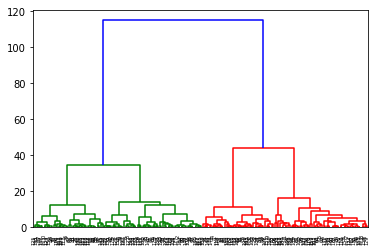

In [17]:
from sklearn.datasets import make_blobs
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0]

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

# save clusters for chart
y_hc = hc.fit_predict(points)

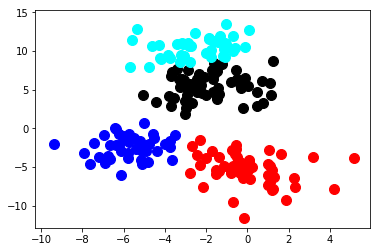

In [18]:
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')

## A / B testing
![ab test](./img/how-can-i-ab.png)

### One sample t-test

In [21]:
from scipy import stats

female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]
general_population_bps = 120

result = stats.ttest_1samp(female_doctor_bps, general_population_bps)
result.pvalue

0.00023838063630967753

### Two sample t-test

In [26]:
from scipy import stats

female_doctor_bps = [128, 127, 118, 115, 144, 142, 133, 140, 132, 131, 
                     111, 132, 149, 122, 139, 119, 136, 129, 126, 128]

male_consultant_bps = [118, 115, 112, 120, 124, 130, 123, 110, 120, 121,
                      123, 125, 129, 130, 112, 117, 119, 120, 123, 128]

result = stats.ttest_ind(female_doctor_bps, male_consultant_bps)
result.pvalue

0.0011571376404026158

### Paired t-test

In [27]:
from scipy import stats

control = [8.0, 7.1, 6.5, 6.7, 7.2, 5.4, 4.7, 8.1, 6.3, 4.8]
treatment = [9.9, 7.9, 7.6, 6.8, 7.1, 9.9, 10.5, 9.7, 10.9, 8.2]

result = stats.ttest_rel(control, treatment)
result.pvalue

0.0055329408161001415

### Analysis of Variance - ANOVA

In [30]:
from scipy import stats

ctrl = [4.17, 5.58, 5.18, 6.11, 4.5, 4.61, 5.17, 4.53, 5.33, 5.14]
trt1 = [4.81, 4.17, 4.41, 3.59, 5.87, 3.83, 6.03, 4.89, 4.32, 4.69]
trt2 = [6.31, 5.12, 5.54, 5.5, 5.37, 5.29, 4.92, 6.15, 5.8, 5.26]

result = stats.f_oneway(ctrl, trt1, trt2)
result.pvalue

0.0159099583256229

### Kruskal Wallis test

In [2]:
from scipy import stats

x = [1, 3, 5, 7, 9]
y = [2, 4, 6, 8, 10]

result = stats.kruskal(x, y)
result.pvalue

0.6015081344405895

## Correlation
Original code can be found [here](http://benalexkeen.com/correlation-in-python/)

### Positive correlation

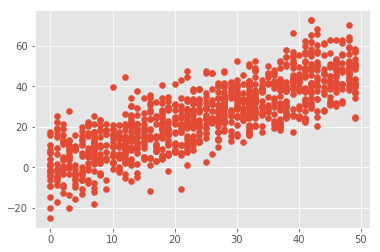

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Positive Correlation with some noise
y = x + np.random.normal(0, 10, 1000)

# Use np.corrcoef(x, y) for numbers

plt.scatter(x, y)
plt.show()

### Negative correlation

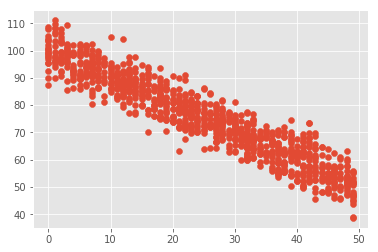

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(1)

# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)

# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

# Use np.corrcoef(x, y) for numbers

plt.scatter(x, y)
plt.show()

### Weak or no correlation

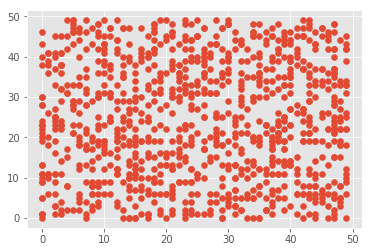

In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

# Use np.corrcoef(x, y) for numbers

plt.scatter(x, y)
plt.show()

### Correlation matrix

In [6]:
import pandas as pd

df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # positively correlated with 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # negatively correlated with 'a'
df['d'] = np.random.randint(0, 50, 1000) # not correlated with 'a'

df.corr()

,a,b,c,d
a,1.000000,0.814476,-0.943949,0.043955
b,0.814476,1.000000,-0.766751,0.016674
c,-0.943949,-0.766751,1.000000,-0.021663
d,0.043955,0.016674,-0.021663,1.000000


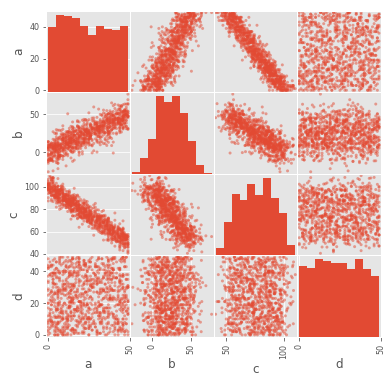

In [8]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()

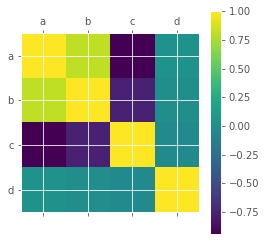

In [9]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

## Heatmaps
Original code can be found [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

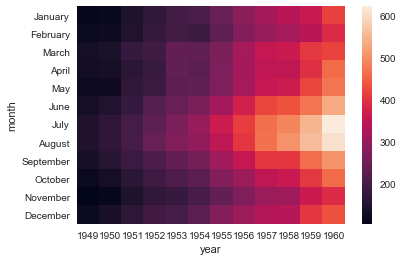

In [12]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)

# See the original source code link for a lot of other options

### Time series analysis
Original code can be found [here](https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial)

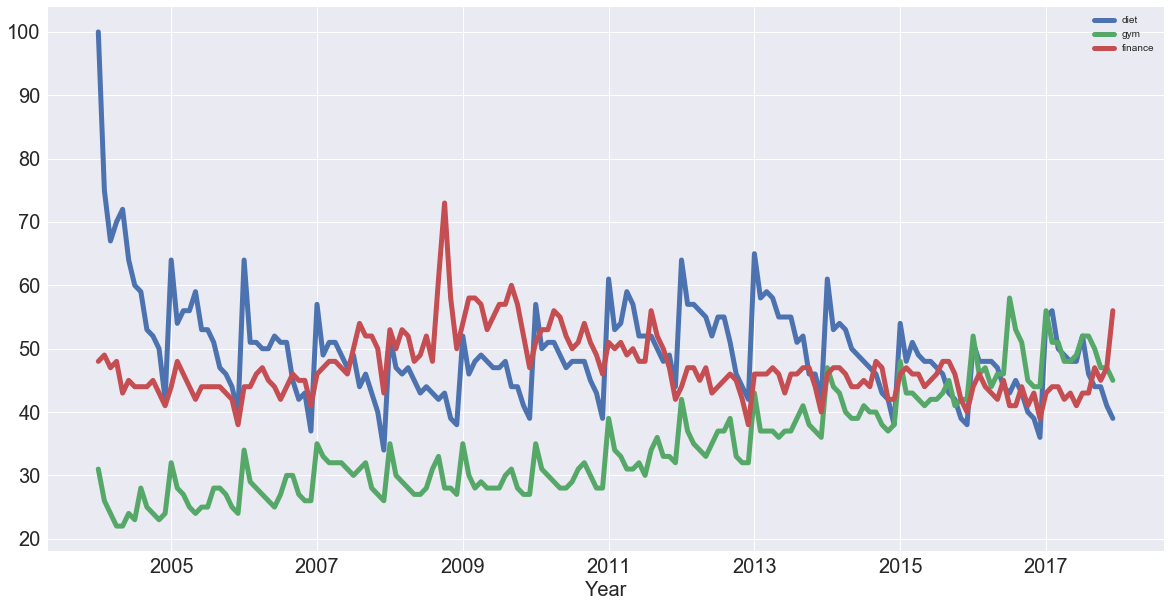

In [16]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Read data and change columns
df = pd.read_csv('data/multiTimeline.csv')
df.columns = ['month', 'diet', 'gym', 'finance']

# Change month column from object to date time
df.month = pd.to_datetime(df.month)

# Set the month as index of the data frame
# This effectively turns your month into a row identifier
df.set_index('month', inplace=True)

df.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

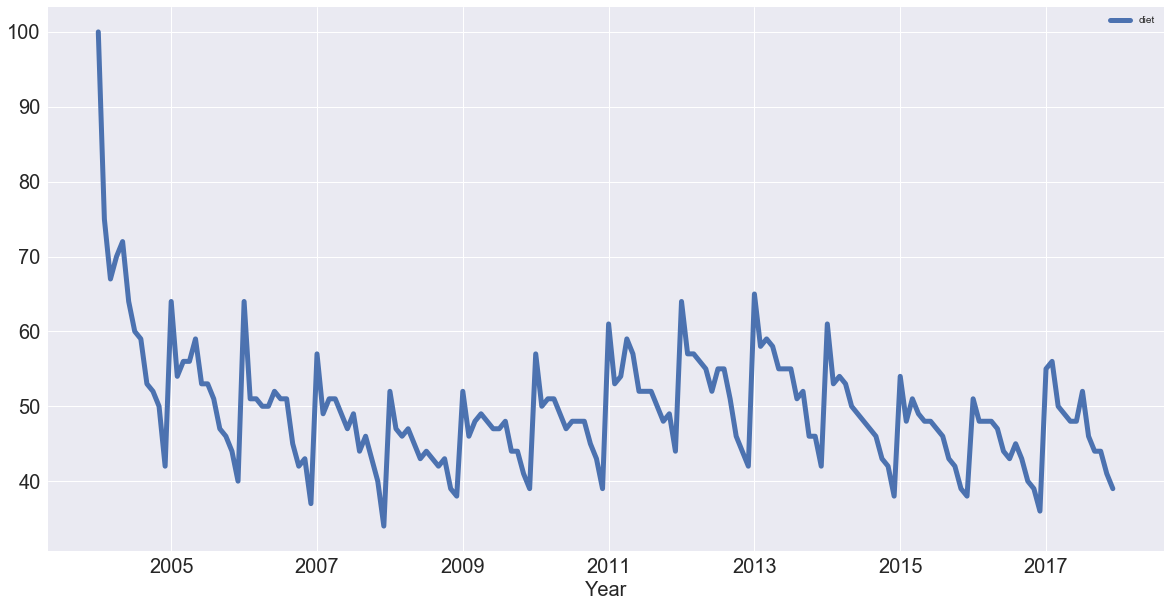

In [17]:
# Plot a single column
df[['diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

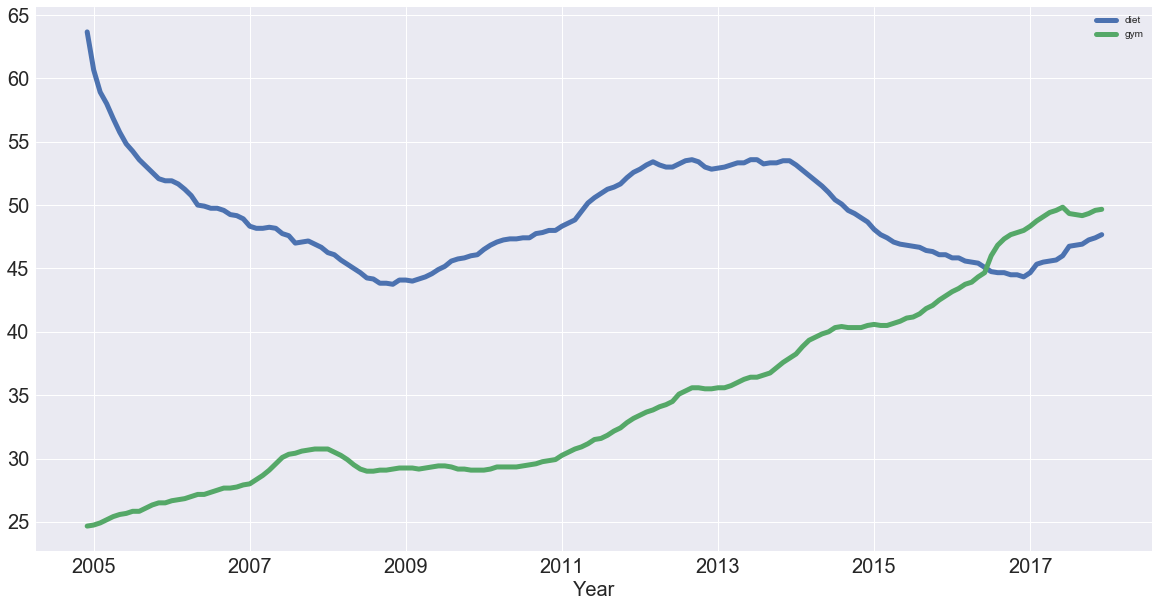

In [20]:
# Identifying Trends in Time Series
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

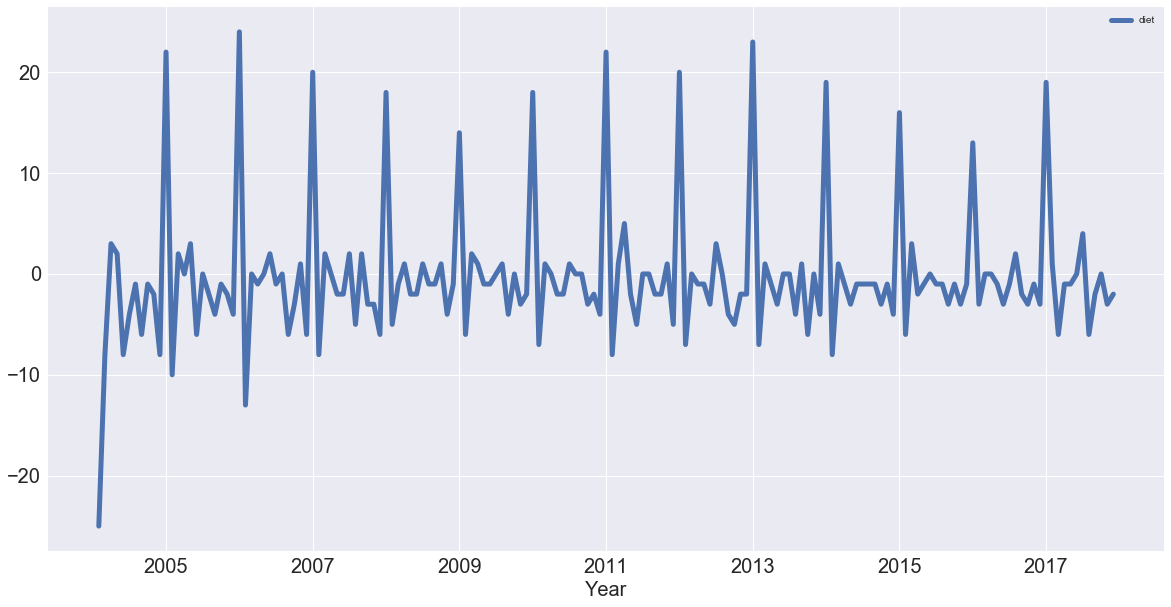

In [21]:
# Remove seasonality
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

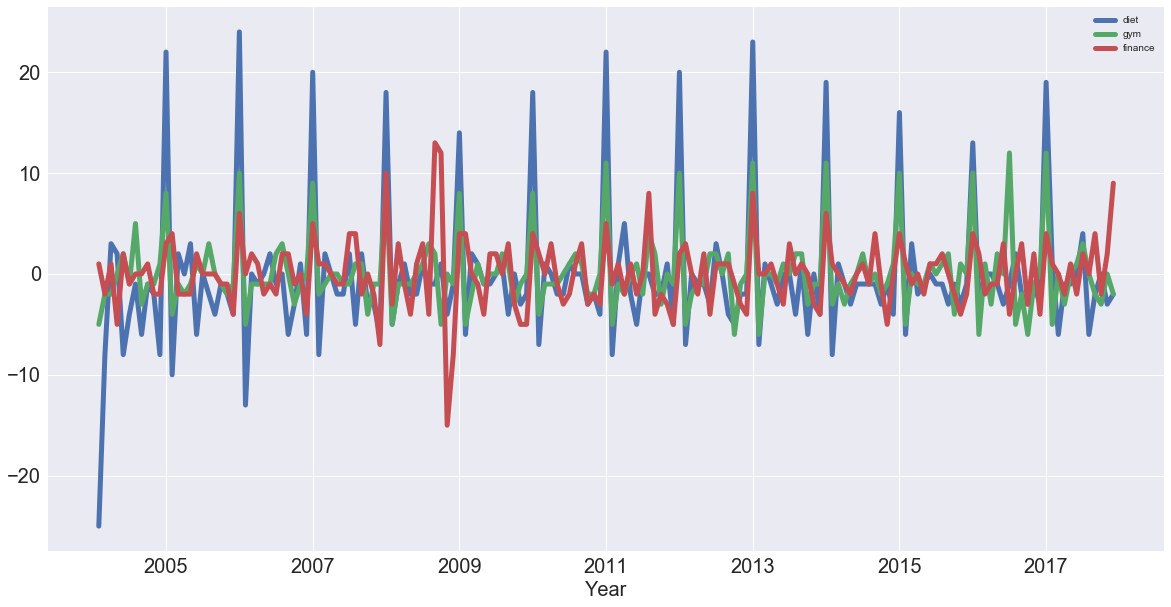

In [22]:
# Plot correlations
df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

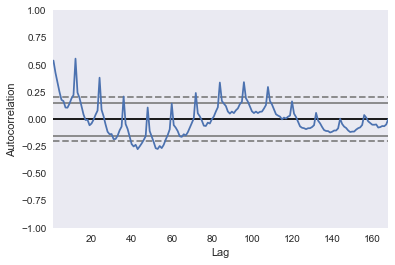

In [23]:
# Auto correlation
pd.plotting.autocorrelation_plot(diet);

## Network analysis

## Spatial data analysis